In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#!pip install opencv-python
import cv2
import random
from tensorflow import keras
import tensorflow as tf

## Exploring dataset

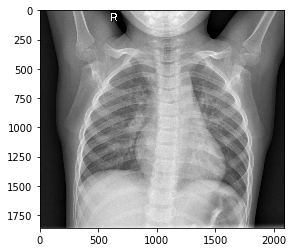

In [2]:
DATADIR="C:/Users/User/Downloads/Cheating is learning/chest_x_ray/train"
CATEGORIES = ["Normal","Pneumonia"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #path to Normal or Pnuemonia folder
    for img in os.listdir(path):   #iterating every image
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [ ]:
print(img_array.shape)

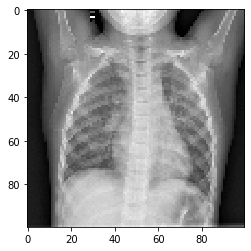

In [3]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resizing pictures to same size IMG_SIZE x IMG_SIZE
plt.imshow(new_array, cmap='gray')
plt.show()

## Getting real

In [4]:
training_data = []
DATADIR="C:/Users/User/Downloads/Cheating is learning/chest_x_ray/train"
CATEGORIES = ["Normal","Pneumonia"]
IMG_SIZE = 100

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #path to Normal or Pnuemonia folder
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=normal 1=pneumonia
        for img in os.listdir(path): #iterating every image
            try:     
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resizing pictures to same size IMG_SIZE x IMG_SIZE
                training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()
random.shuffle(training_data)
X_train = []
y_train = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #this 1 is here because the data is 
                                                               #grayscale. otherwise would be 3
X_train = tf.keras.utils.normalize(X_train, axis=1)
y_train = np.asarray(y_train)
#test data
test_data = []
DATADIR="C:/Users/User/Downloads/Cheating is learning/chest_x_ray/test"
CATEGORIES = ["Normal","Pneumonia"]
IMG_SIZE = 100

def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #path to Normal or Pnuemonia folder
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=normal 1=pneumonia
        for img in os.listdir(path): #iterating every image
            try:     
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resizing pictures to same size IMG_SIZE x IMG_SIZE
                training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_test_data()
random.shuffle(test_data)

X_test = []
y_test = []
for features,label in training_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #this 1 is here because the data is grayscale. otherwise would be 3
X_test = tf.keras.utils.normalize(X_test, axis=1)
y_test = np.asarray(y_test)

Tuning the hyperparameters

In [5]:
model_results = []

def train_model(n_nodes, n_layers, n_epochs):
    model = tf.keras.models.Sequential() #feed forward network
    #layers:
    model.add(tf.keras.layers.Flatten())#input; input is flattened because original image is 28x28. we want it to be 1d input
    #2 hidden layers as the problem itself is not complex
    for x in range(n_layers):
        model.add(tf.keras.layers.Dense(n_nodes, activation=tf.nn.relu)) #hidden
    
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax)) #output; 10 because we have 10 possible solutions

    #training parameters
    model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.fit(X_train, y_train, epochs=n_epochs)
    val_loss, val_acc = model.evaluate(X_test, y_test)
    #writing the results
    model_results.append([round(val_acc*100,2), n_layers,n_nodes, val_loss])
    
    
nodes_list=[100,150] #Number of nodes I want to use
n_layers_list = [2,3,4,5] #number of hidden layers

for layer in n_layers_list: #this loops the number of possible layers specified in n_layers_list
    for nodes in nodes_list: #this loops the number of nodes 
        train_model(nodes,layer,5)
model_results

W0705 13:29:05.348698  3272 deprecation.py:506] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
5216/5216 [==============================] - 2s 397us/sample - loss: 0.3090 - acc: 0.8675s - loss: 0.3626 -
Epoch 2/5
5216/5216 [==============================] - 2s 366us/sample - loss: 0.1703 - acc: 0.9323
Epoch 3/5
5216/5216 [==============================] - 2s 368us/sample - loss: 0.1546 - acc: 0.9410s - loss: 0.1533 - acc: 0.
Epoch 4/5
5216/5216 [==============================] - 2s 372us/sample - loss: 0.1328 - acc: 0.9469
Epoch 5/5
5840/5840 [==============================] - 1s 170us/sample - loss: 0.1823 - acc: 0.9361
Epoch 1/5
5216/5216 [==============================] - 3s 511us/sample - loss: 0.3136 - acc: 0.8593
Epoch 2/5
5216/5216 [==============================] - 3s 519us/sample - loss: 0.1774 - acc: 0.9296
Epoch 3/5
5216/5216 [==============================] - 3s 499us/sample - loss: 0.1571 - acc: 0.9381
Epoch 4/5
5216/5216 [==============================] - 3s 489us/sample - loss: 0.1414 - acc: 0.9482
Epoch 5/5
5840/5840 [==============================] - 1

[[93.61, 2, 100, 0.18233014098432374],
 [92.23, 2, 150, 0.19527829961009222],
 [93.36, 3, 100, 0.17764208870493386],
 [93.85, 3, 150, 0.18735986811249222],
 [93.24, 4, 100, 0.21910171007086868],
 [93.73, 4, 150, 0.1959942463861957],
 [93.77, 5, 100, 0.19490135794582025],
 [93.89, 5, 150, 0.18066091417551858]]

The higest hyperparametrs are 150 nodes and 5 hidden layers. Lets train that on 30 epochs.

In [6]:
train_model(150,5,30)

Epoch 1/30
5216/5216 [==============================] - 3s 549us/sample - loss: 0.2839 - acc: 0.8769
Epoch 2/30
5216/5216 [==============================] - 3s 520us/sample - loss: 0.1825 - acc: 0.9304
Epoch 3/30
5216/5216 [==============================] - 3s 537us/sample - loss: 0.1445 - acc: 0.9440
Epoch 4/30
5216/5216 [==============================] - 3s 544us/sample - loss: 0.1383 - acc: 0.9475
Epoch 5/30
5216/5216 [==============================] - 3s 516us/sample - loss: 0.1232 - acc: 0.9538
Epoch 6/30
5216/5216 [==============================] - 3s 518us/sample - loss: 0.1282 - acc: 0.9492
Epoch 7/30
5216/5216 [==============================] - 3s 526us/sample - loss: 0.1224 - acc: 0.9540
Epoch 8/30
5216/5216 [==============================] - 3s 538us/sample - loss: 0.1242 - acc: 0.9546
Epoch 9/30
5216/5216 [==============================] - 3s 579us/sample - loss: 0.1072 - acc: 0.9603
Epoch 10/30
5216/5216 [==============================] - 3s 533us/sample - loss: 0.1102 - a

The final test accuracy is 96.28%